<center><H1>Evictions Analysis Data Preparation</H1></center>
<center>Capstone Project
<br>Scott Linne
<br>January 2019</center>

 This Notebook appears to be the closest one to date for solving this. The R2 values and RMSE are in line with other submitters in the course

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

C:\Users\scott\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#load data sets
test_values = pd.read_csv('test_values.csv')
train_values = pd.read_csv('train_values_oAriVNN.csv')
train_labels = pd.read_csv('train_labels.csv')

In [3]:
# merge the train labels and train_values to create the consolidated data frame
data = pd.merge(train_labels, train_values, how='inner', on='row_id')

In [4]:
data.shape

(2546, 49)

In [5]:
data.head()

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,681,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,...,1960.0,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112
1,1,0,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,...,890.0,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843
2,2,29,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,...,3509.0,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741
3,3,841,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,...,2219.0,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072
4,4,2,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,...,3410.0,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877


In [6]:
# look at the columns available in the training data
data.columns

Index(['row_id', 'evictions', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
       'pct_low_birthweight', 'pct_excessive_drinking',
       'pct_physical_inactivity', 'air_pollution_particulate_matter_value',
       'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pop_per_dentist',
       'pop_per_primary_care_physician', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_t

## Treat Missing Values and also check for any duplicates

In [7]:
# check for missing values
data.isna().any()

row_id                                        False
evictions                                     False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                        True
median_property_value                          True
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other   

In [8]:
data[data['median_household_income'].isna()]

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
2306,2306,0,95253e1,a,930f257,116.0,14.0,50.677,871.0,NaN,...,NaN,0.467,0.273,0.095,0.198610,0.518371,0.264151,0.018868,9.900990,9.900990
2377,2377,0,95253e1,b,930f257,116.0,14.0,50.971,870.0,NaN,...,NaN,0.461,0.126,0.099,0.196985,0.521608,0.262312,0.019095,21.052632,10.526316


In [9]:
data[data['median_property_value'].isna()]

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
1461,1461,0,375421b,b,930f257,563.0,95.0,67.695,558.0,36438.0,...,NaN,0.485,0.253,0.147,0.322645,0.333667,0.192385,0.151303,9.523810,7.142857
1816,1816,0,375421b,a,930f257,570.0,96.0,67.239,558.0,36438.0,...,NaN,0.496,0.219,0.162,0.322000,0.336000,0.192000,0.150000,7.263923,0.000000


In [10]:
 # fill na values for household income with the mean
data['median_household_income'].fillna(data['median_household_income'].mean(), inplace=True)

In [11]:
# fill na values for property value with the mean
data['median_property_value'].fillna(data['median_property_value'].mean(), inplace=True)

In [12]:
data.isna().any()

row_id                                        False
evictions                                     False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other   

In [13]:
# drop columns with nas. There are too many missing values in these columns to make them useful
data.drop(['pct_adult_smoking','pct_low_birthweight', 'pct_excessive_drinking', 'air_pollution_particulate_matter_value','homicides_per_100k','motor_vehicle_crash_deaths_per_100k','pop_per_dentist','pop_per_primary_care_physician'], axis=1, inplace=True)

In [14]:
# ensure that all missing values have been removed. Machine learning algorithms cannot process missing data
data.isna().any()

row_id                                        False
evictions                                     False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other   

In [15]:
# check data types and determine if we have any categorical variables that will need to be converted to dummies
data.dtypes

row_id                                          int64
evictions                                       int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                

<b>RUCC, Urban Influence, and econimic typology</b> are categorical variables. 
These may be valuable as they indicate economic conditions these may be converted and set with dummy variables

In [16]:
#data = data[data.evictions != 0]

In [17]:
np.array(data['evictions'])

array([ 681,    0,   29, ...,   95,   82, 1474], dtype=int64)

In [18]:
plusone = np.array(data['evictions'])

In [19]:
pd.Series(plusone)

0        681
1          0
2         29
3        841
4          2
5       4191
6         24
7        225
8         93
9          6
10        19
11         0
12         0
13        90
14       311
15         0
16       128
17         1
18        97
19       504
20       171
21        43
22        16
23        46
24        53
25        56
26         0
27         0
28         0
29         0
        ... 
2516       7
2517       9
2518       6
2519       4
2520       5
2521      60
2522      31
2523       0
2524      54
2525     459
2526      12
2527     200
2528     161
2529       2
2530    6056
2531       1
2532       1
2533      33
2534       1
2535       0
2536       0
2537      10
2538      11
2539      32
2540       2
2541      16
2542       2
2543      95
2544      82
2545    1474
Length: 2546, dtype: int64

In [20]:
plusone = plusone+1

In [21]:
data['evictionsNormed'] = plusone

In [22]:
data.head()

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictionsNormed
0,0,681,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,682
1,1,0,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,1
2,2,29,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,30
3,3,841,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,842
4,4,2,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,3


In [23]:
data['evictionsNormed'] = np.log(plusone)

In [24]:
data[['evictions', 'evictionsNormed']].head(30)

,evictions,evictionsNormed
0,681,6.525030
1,0,0.000000
2,29,3.401197
3,841,6.735780
4,2,1.098612
5,4191,8.340933
6,24,3.218876
7,225,5.420535
8,93,4.543295
9,6,1.945910


In [25]:
data['evictionsNormed'].head()  # this is the one we want to send through the algorithm, this is normalized

0    6.525030
1    0.000000
2    3.401197
3    6.735780
4    1.098612
Name: evictionsNormed, dtype: float64

In [26]:
# plt.hist(pluslog)
# plt.show()

In [27]:
#logs = pd.Series(pluslog)

In [28]:
#back = np.exp(logs)

In [29]:
#back = pd.Series(back)

In [30]:
#back = back-1

In [31]:
#pd.Series(back)

In [32]:
#data['rucc'].value_counts()

In [33]:
#data = pd.get_dummies(data, columns=['rucc','urban_influence','economic_typology'], drop_first=True)

In [34]:
# convert year to a dummy variable
#data = pd.get_dummies(data, columns=['year'], prefix='Year', prefix_sep='_', drop_first=True)

In [35]:
#data.head()

In [36]:
data.dtypes

row_id                                          int64
evictions                                       int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                

# Saved prepped data for easy loading later

In [37]:
#data.to_csv('prepped_datawithZeros.csv')

# Explore Data with Visualizations to identify useful features

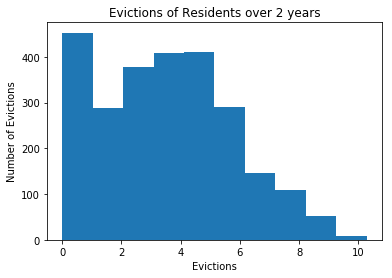

In [38]:
plt.hist(data['evictionsNormed'])
plt.title('Evictions of Residents over 2 years')
plt.xlabel('Evictions')
plt.ylabel('Number of Evictions')
plt.show()

The data indicates the number of evictions by county is heavily skewed to the right. There are many outliers in the data. This variable will need to be adjusted in order to be useful in a machine learning algorithm

Check for correlations within the features to identify if any variables change relative to the number of evictions.

In [39]:
data[['evictions','evictionsNormed', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults',
       'pct_uninsured_children', 'pct_adult_obesity', 'pct_diabetes',
       'pct_physical_inactivity', 'heart_disease_mortality_per_100k',
       'pct_female', 'pct_below_18_years_of_age',
       'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k']].corr()

,evictions,evictionsNormed,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,...,heart_disease_mortality_per_100k,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
evictions,1.000000,0.511535,0.808024,0.806802,0.368408,0.301743,0.131490,0.174026,0.155838,-0.278551,...,-0.077513,0.131132,0.091834,-0.265322,-0.040634,-0.299438,-0.029823,0.293027,0.174273,-0.209737
evictionsNormed,0.511535,1.000000,0.487526,0.453297,0.400963,0.505624,0.279000,0.348057,0.371377,-0.144287,...,-0.051853,0.305654,0.073282,-0.412739,-0.174740,-0.308195,-0.023929,0.402251,0.157772,-0.205894
population,0.808024,0.487526,1.000000,0.974264,0.353268,0.449865,0.262047,0.362910,0.180068,-0.280231,...,-0.149395,0.122986,0.095099,-0.266593,-0.056857,-0.351491,-0.058303,0.365148,0.152380,-0.258188
renter_occupied_households,0.806802,0.453297,0.974264,1.000000,0.404281,0.410921,0.205564,0.360387,0.168291,-0.284968,...,-0.129081,0.116302,0.060910,-0.247346,-0.035249,-0.331082,-0.076684,0.342575,0.153541,-0.236451
pct_renter_occupied,0.368408,0.400963,0.353268,0.404281,1.000000,0.295288,-0.050168,0.229072,0.199520,-0.463292,...,0.036273,0.083948,0.114939,-0.453915,0.101773,-0.380991,-0.094164,0.285635,0.355143,-0.279883
median_gross_rent,0.301743,0.505624,0.449865,0.410921,0.295288,1.000000,0.735655,0.827344,0.233079,-0.212088,...,-0.405290,0.085231,0.070569,-0.397240,-0.328307,-0.579815,0.054099,0.696995,0.065303,-0.514980
median_household_income,0.131490,0.279000,0.262047,0.205564,-0.050168,0.735655,1.000000,0.680527,-0.190264,0.111025,...,-0.536809,0.056160,0.168281,-0.296879,-0.558119,-0.448223,0.194958,0.686736,0.031413,-0.502179
median_property_value,0.174026,0.348057,0.362910,0.360387,0.229072,0.827344,0.680527,1.000000,0.164375,-0.032237,...,-0.489056,0.085829,-0.091433,-0.205315,-0.390758,-0.532652,0.024444,0.725678,-0.077634,-0.431548
rent_burden,0.155838,0.371377,0.180068,0.168291,0.199520,0.233079,-0.190264,0.164375,1.000000,-0.182015,...,0.110709,0.149373,-0.179631,-0.111891,0.122764,-0.131191,-0.141255,0.094503,-0.099206,0.025779
pct_white,-0.278551,-0.144287,-0.280231,-0.284968,-0.463292,-0.212088,0.111025,-0.032237,-0.182015,1.000000,...,-0.147742,0.070977,-0.302656,0.409834,-0.519963,0.356022,0.213035,-0.007186,-0.374518,0.259047


Use a Feature Selection algorithm to identify useful features

In [40]:
data[['evictions', 'evictionsNormed','population', 'renter_occupied_households', 'median_household_income','median_gross_rent', 
        'median_property_value', 'rent_burden', 'pct_renter_occupied','pct_white', 'pct_af_am', 'pct_hispanic', 
        'pct_am_ind', 'pct_asian', 'pct_multiple', 'poverty_rate','pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children', 'pct_female', 'pct_adults_less_than_a_high_school_diploma']].corr().style.background_gradient()

,evictions,evictionsNormed,population,renter_occupied_households,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_female,pct_adults_less_than_a_high_school_diploma
evictions,1,0.511535,0.808024,0.806802,0.13149,0.301743,0.174026,0.155838,0.368408,-0.278551,0.195535,0.142145,-0.0380941,0.321428,0.0684324,0.0259372,-0.0200832,0.0574762,-0.034523,0.131132,-0.0406337
evictionsNormed,0.511535,1,0.487526,0.453297,0.279,0.505624,0.348057,0.371377,0.400963,-0.144287,0.193193,-0.0655505,-0.0573963,0.391541,0.192244,-0.0446944,0.071832,-0.195249,-0.391062,0.305654,-0.17474
population,0.808024,0.487526,1,0.974264,0.262047,0.449865,0.36291,0.180068,0.353268,-0.280231,0.105124,0.205647,-0.0424187,0.510165,0.0626958,-0.0329097,-0.0257856,0.0154079,-0.0654384,0.122986,-0.0568568
renter_occupied_households,0.806802,0.453297,0.974264,1,0.205564,0.410921,0.360387,0.168291,0.404281,-0.284968,0.12337,0.195405,-0.0393243,0.496126,0.0595903,-0.000166821,-0.0202375,0.0300397,-0.0572124,0.116302,-0.0352488
median_household_income,0.13149,0.279,0.262047,0.205564,1,0.735655,0.680527,-0.190264,-0.0501679,0.111025,-0.251263,0.045219,-0.108566,0.472496,0.0805218,-0.725208,-0.487066,-0.485359,-0.16543,0.0561599,-0.558119
median_gross_rent,0.301743,0.505624,0.449865,0.410921,0.735655,1,0.827344,0.233079,0.295288,-0.212088,0.0535008,0.144988,-0.0904367,0.630138,0.156573,-0.371338,-0.182527,-0.216448,-0.127244,0.085231,-0.328307
median_property_value,0.174026,0.348057,0.36291,0.360387,0.680527,0.827344,1,0.164375,0.229072,-0.0322366,-0.0728237,0.0162762,-0.0581712,0.609864,0.113321,-0.39118,-0.168627,-0.297491,-0.163542,0.0858291,-0.390758
rent_burden,0.155838,0.371377,0.180068,0.168291,-0.190264,0.233079,0.164375,1,0.19952,-0.182015,0.328064,-0.077212,-0.0864053,0.143989,0.033479,0.354528,0.426929,0.0218087,-0.265705,0.149373,0.122764
pct_renter_occupied,0.368408,0.400963,0.353268,0.404281,-0.0501679,0.295288,0.229072,0.19952,1,-0.463292,0.2789,0.260115,0.0436331,0.397631,0.178057,0.258397,0.0261985,0.167806,0.0117749,0.0839477,0.101773
pct_white,-0.278551,-0.144287,-0.280231,-0.284968,0.111025,-0.212088,-0.0322366,-0.182015,-0.463292,1,-0.627887,-0.639573,-0.209029,-0.270286,-0.0592216,-0.468282,-0.235029,-0.53415,-0.303454,0.0709771,-0.519963


In [41]:
data.columns

Index(['row_id', 'evictions', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_diabetes', 'pct_physical_inactivity',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictionsNormed'],
      dtype='object')

In [42]:
predictors= ['population','median_household_income','median_gross_rent', 'median_property_value', 'rent_burden', 'pct_white', 'pct_af_am', 'pct_asian', 'pct_multiple', 'poverty_rate','pct_unemployment','pct_female', 'pct_uninsured_children','pct_adults_with_high_school_diploma','pct_adults_less_than_a_high_school_diploma']

In [43]:
# store features into new features dataframe
features = data[predictors]

'pct_civilian_labor', 'pct_adult_obesity', 'pct_diabetes','pct_physical_inactivity', 'heart_disease_mortality_per_100k','pct_below_18_years_of_age',
       'pct_aged_65_years_and_older',, 'birth_rate_per_1k','death_rate_per_1k' 'pct_adults_bachelors_or_higher' , 'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college' 'renter_occupied_households','pct_renter_occupied', ''pct_adults_less_than_a_high_school_diploma'', 'pct_uninsured_children',

Store a set of unused features here for possible later use


 [ 'rucc_Metro - Counties in metro areas of 250,000 to 1 million population',
       'rucc_Metro - Counties in metro areas of fewer than 250,000 population',
       'rucc_Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area',
       'rucc_Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area',
       'rucc_Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area',
       'rucc_Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area',
       'rucc_Nonmetro - Urban population of 20,000 or more, adjacent to a metro area',
       'rucc_Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area',
       'urban_influence_Micropolitan adjacent to a large metro area',
       'urban_influence_Micropolitan adjacent to a small metro area',
       'urban_influence_Micropolitan not adjacent to a metro area',
       'urban_influence_Noncore adjacent to a large metro area',
       'urban_influence_Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents',
       'urban_influence_Noncore adjacent to a small metro with town of at least 2,500 residents',
       'urban_influence_Noncore adjacent to micro area and contains a town of 2,500-19,999 residents',
       'urban_influence_Noncore adjacent to micro area and does not contain a town of at least 2,500 residents',
       'urban_influence_Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents',
       'urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents',
       'urban_influence_Small-in a metro area with fewer than 1 million residents',
       'economic_typology_Federal/State government-dependent',
       'economic_typology_Manufacturing-dependent',
       'economic_typology_Mining-dependent',
       'economic_typology_Nonspecialized', 'economic_typology_Recreation',
       'Year_b']


In [44]:
print(features.shape)

(2546, 15)


In [45]:
# # use Feature Selection from sci kit learn

# sel = fs.VarianceThreshold(threshold=(.5 * (1 - .5)))
# Features_reduced = sel.fit_transform(features)

# ## Print the support and shape for the transformed features
# print(sel.get_support(indices=True))

# # assign indices to cols variable, an integer, then use this integer on features.columns[cols], it will return 
# #a list of the selected
# # column names
# cols = sel.get_support(indices=True)


# print(sel.get_support())
# print(Features_reduced.shape)

# Features_reduced = pd.DataFrame(Features_reduced)
# Features_reduced.head()

In [46]:
# Features_reduced.columns = features.columns[cols]

In [47]:
# Features_reduced.columns

In [48]:
# view final selection of features
# Features_reduced.head()

In [49]:
features.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma
0,45009.0,33315.0,643.0,98494.0,33.389,0.412070,0.493459,0.004575,0.015921,18.451,0.093,0.532,0.068,0.375000,0.233000
1,9872.0,43724.0,517.0,85444.0,26.477,0.838682,0.015588,0.005771,0.028245,11.922,0.040,0.509,0.092,0.397590,0.073293
2,17625.0,37777.0,671.0,136162.0,32.500,0.873733,0.041040,0.004873,0.028728,11.883,0.065,0.451,0.108,0.303393,0.206587
3,134136.0,30607.0,603.0,70062.0,31.959,0.264083,0.240836,0.007244,0.025582,26.025,0.084,0.519,0.101,0.334995,0.248255
4,6936.0,44237.0,668.0,187066.0,29.339,0.924502,0.005146,0.000707,0.016672,10.674,0.064,0.487,0.119,0.276342,0.058648


In [50]:
# store predictor features into X and dependent variable 'eviction' into y
#X = Features_reduced
X = features
y = data[['evictionsNormed']]

In [51]:
X.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma
0,45009.0,33315.0,643.0,98494.0,33.389,0.412070,0.493459,0.004575,0.015921,18.451,0.093,0.532,0.068,0.375000,0.233000
1,9872.0,43724.0,517.0,85444.0,26.477,0.838682,0.015588,0.005771,0.028245,11.922,0.040,0.509,0.092,0.397590,0.073293
2,17625.0,37777.0,671.0,136162.0,32.500,0.873733,0.041040,0.004873,0.028728,11.883,0.065,0.451,0.108,0.303393,0.206587
3,134136.0,30607.0,603.0,70062.0,31.959,0.264083,0.240836,0.007244,0.025582,26.025,0.084,0.519,0.101,0.334995,0.248255
4,6936.0,44237.0,668.0,187066.0,29.339,0.924502,0.005146,0.000707,0.016672,10.674,0.064,0.487,0.119,0.276342,0.058648


In [52]:
y.head()

,evictionsNormed
0,6.525030
1,0.000000
2,3.401197
3,6.735780
4,1.098612


In [53]:
# store X and y as numpy arrays for use in the scaler
#X = np.array(X)
#y = np.array(y)

In [54]:
# split the data set into training and test sets for use in regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1909, 15)
(637, 15)
(1909, 1)
(637, 1)


In [56]:
# scale numerical variables

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
X_train = scaler.transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

In [61]:
y_train = np.array(y_train)

In [62]:
y_test = np.array(y_test)

In [63]:
# from datetime import date

In [64]:
# dt = str(date.today())

In [65]:
# pd.DataFrame(X_train).to_csv('X_train'+dt+'.csv')
# pd.DataFrame(X_test).to_csv('X_test'+dt+'.csv')
# pd.DataFrame(y_train).to_csv('y_train'+dt+'.csv')
# pd.DataFrame(y_test).to_csv('y_test'+dt+'.csv')

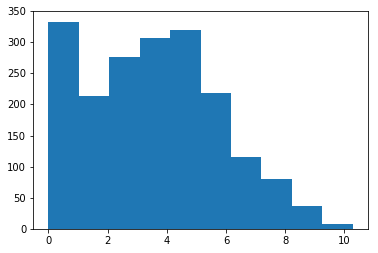

In [66]:
plt.hist(y_train)
plt.show()

# Stop here for now 

## Start Random Forest Regressor Here

In [67]:
# adjust parameters
regr = RandomForestRegressor()

In [68]:
X_train.shape

(1909, 15)

In [69]:
y_train.shape

(1909, 1)

In [70]:
X_test.shape

(637, 15)

In [71]:
y_test.shape

(637, 1)

In [72]:
y_train = np.ravel(y_train)

In [73]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
print(regr.feature_importances_)

[0.8117889  0.00982761 0.01387706 0.01331224 0.01690821 0.01152133
 0.02827383 0.00928221 0.01192727 0.01724586 0.00850553 0.011362
 0.01241401 0.01018544 0.01356852]


In [75]:
predict = regr.predict(X_test)

In [76]:
X_test.shape

(637, 15)

In [77]:
#predict

In [78]:
predict.shape

(637,)

In [79]:
pd.DataFrame(predict).head()

,0
0,5.626563
1,4.069720
2,4.345236
3,6.436838
4,3.750840


In [80]:
y_test

array([[6.13339804],
       [4.11087386],
       [4.60517019],
       [6.18414889],
       [2.56494936],
       [7.62510715],
       [0.69314718],
       [6.64378973],
       [4.81218436],
       [2.39789527],
       [8.70516542],
       [1.09861229],
       [0.        ],
       [4.60517019],
       [2.19722458],
       [1.38629436],
       [5.7235851 ],
       [4.04305127],
       [0.        ],
       [3.76120012],
       [5.0937502 ],
       [5.57972983],
       [2.77258872],
       [6.50279005],
       [8.02059915],
       [3.4339872 ],
       [0.69314718],
       [1.38629436],
       [0.        ],
       [6.92362863],
       [5.43807931],
       [2.7080502 ],
       [6.56667243],
       [1.79175947],
       [2.63905733],
       [2.39789527],
       [9.47876317],
       [0.        ],
       [1.09861229],
       [4.59511985],
       [8.92132408],
       [0.        ],
       [6.72262979],
       [1.38629436],
       [5.53733427],
       [8.32917544],
       [0.        ],
       [4.867

# Evaluate Model Performance

In [81]:
r2 = r2_score(y_true=y_test, y_pred=predict)
print(r2)

0.873692408282048


In [82]:
RMSE = math.sqrt(mean_squared_error(y_true = y_test, y_pred = predict))

print(RMSE)

0.8173619724089054


In [83]:
predict.shape

(637,)

C:\Users\scott\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


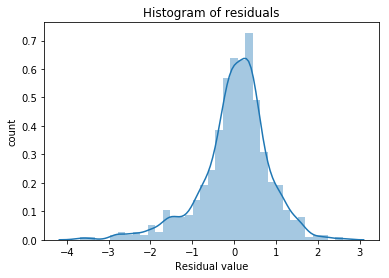

In [84]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, predict) 

In [85]:
import scipy.stats as ss

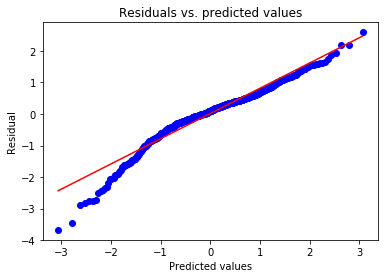

In [86]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, predict) 

In [87]:
# Rescale the Y labels
predict = np.exp(predict)

In [88]:
# undo the workaround with the log of adding 1 to all the zero eviction values
predict = np.floor(pd.Series(predict))-1

In [89]:
#verify values are accurate
predict[:10]

0     276.0
1      57.0
2      76.0
3     623.0
4      41.0
5    1201.0
6      17.0
7     680.0
8      48.0
9       3.0
dtype: float64

# Load Test Data

In [90]:
test_values.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,a110aae,a,37520b7,171046.0,17342.0,25.310,672.0,42828.0,99353.0,...,1399.0,0.509,0.239,0.149,0.112450,0.346386,0.357430,0.183735,12.238462,9.983245
1,1,daa811a,b,3c7c507,114518.0,13776.0,29.492,657.0,53712.0,149404.0,...,1790.0,0.497,0.234,0.154,0.089357,0.366466,0.311245,0.232932,10.213609,8.902167
2,2,04b5074,a,3c7c507,4452.0,317.0,13.208,506.0,48642.0,140740.0,...,1490.0,0.481,0.161,0.247,0.088176,0.395792,0.345691,0.170341,4.697987,10.514541
3,3,261a880,b,be99678,16883.0,1703.0,29.757,786.0,40827.0,139862.0,...,1510.0,0.501,0.236,0.200,0.130261,0.379760,0.330661,0.159319,11.168180,12.601529
4,4,3f91d56,b,26926ff,71393.0,7974.0,30.864,650.0,44688.0,103120.0,...,2419.0,0.526,0.246,0.150,0.129611,0.354935,0.334995,0.180459,12.941045,11.066342


In [91]:
# check for missing values
test_values.isna().any()

row_id                                        False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                              True
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other                                     False
poverty_rate

In [92]:
test_values[test_values['median_gross_rent'].isna()]

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
514,514,c09169c,b,0df5b61,3930.0,318.0,12.459,NaN,64832.0,176658.0,...,NaN,0.492,0.146,0.231,0.075547,0.295229,0.416501,0.212724,5.659892,7.718034
1977,1977,c09169c,a,0df5b61,3919.0,325.0,12.599,NaN,64832.0,175546.0,...,NaN,0.481,0.146,0.253,0.075848,0.292415,0.417166,0.214571,3.051494,3.305785


In [93]:
 # fill na values for household income with the mean
test_values['median_gross_rent'].fillna(test_values['median_gross_rent'].mean(), inplace=True)

In [94]:
# check for missing values
test_values.isna().any()

row_id                                        False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other                                     False
poverty_rate

In [95]:
# drop columns with nas. There are too many missing values in these columns to make them useful
test_values.drop(['pct_adult_smoking','pct_low_birthweight', 'pct_excessive_drinking', 'air_pollution_particulate_matter_value','homicides_per_100k','motor_vehicle_crash_deaths_per_100k','pop_per_dentist','pop_per_primary_care_physician'], axis=1, inplace=True)

In [96]:
# check for missing values
test_values.isna().any()

row_id                                        False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other                                     False
poverty_rate

In [97]:
# store features into new features dataframe
# features = test_values[['population', 'renter_occupied_households', 'median_household_income','median_gross_rent', 
#         'median_property_value', 'rent_burden', 'pct_renter_occupied','pct_white', 'pct_af_am', 'pct_hispanic', 
#         'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
#        'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children', 'pct_adult_obesity', 'pct_diabetes',
#        'pct_physical_inactivity', 'heart_disease_mortality_per_100k','pct_female', 'pct_below_18_years_of_age',
#        'pct_aged_65_years_and_older', 'pct_adults_less_than_a_high_school_diploma', 'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
#        'pct_adults_bachelors_or_higher', 'birth_rate_per_1k','death_rate_per_1k']]

In [98]:
#store features into new features dataframe
features = test_values[predictors]

In [99]:
features.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma
0,171046.0,42828.0,672.0,99353.0,34.738,0.768640,0.136740,0.005135,0.031390,14.572,0.058,0.509,0.039,0.346386,0.112450
1,114518.0,53712.0,657.0,149404.0,25.108,0.859299,0.014054,0.050631,0.014494,6.752,0.046,0.497,0.045,0.366466,0.089357
2,4452.0,48642.0,506.0,140740.0,25.072,0.976854,0.002000,0.000700,0.003429,5.269,0.068,0.481,0.067,0.395792,0.088176
3,16883.0,40827.0,786.0,139862.0,30.767,0.883453,0.000000,0.007568,0.016125,11.349,0.060,0.501,0.122,0.379760,0.130261
4,71393.0,44688.0,650.0,103120.0,27.092,0.732230,0.028232,0.006210,0.052701,13.211,0.047,0.526,0.116,0.354935,0.129611


In [100]:
X = features

In [101]:
X.head()

,population,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_white,pct_af_am,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_female,pct_uninsured_children,pct_adults_with_high_school_diploma,pct_adults_less_than_a_high_school_diploma
0,171046.0,42828.0,672.0,99353.0,34.738,0.768640,0.136740,0.005135,0.031390,14.572,0.058,0.509,0.039,0.346386,0.112450
1,114518.0,53712.0,657.0,149404.0,25.108,0.859299,0.014054,0.050631,0.014494,6.752,0.046,0.497,0.045,0.366466,0.089357
2,4452.0,48642.0,506.0,140740.0,25.072,0.976854,0.002000,0.000700,0.003429,5.269,0.068,0.481,0.067,0.395792,0.088176
3,16883.0,40827.0,786.0,139862.0,30.767,0.883453,0.000000,0.007568,0.016125,11.349,0.060,0.501,0.122,0.379760,0.130261
4,71393.0,44688.0,650.0,103120.0,27.092,0.732230,0.028232,0.006210,0.052701,13.211,0.047,0.526,0.116,0.354935,0.129611


In [102]:
X.shape

(2420, 15)

In [103]:
X = np.array(X)

In [104]:
X

array([[1.71046000e+05, 4.28280000e+04, 6.72000000e+02, ...,
        3.90000000e-02, 3.46385542e-01, 1.12449799e-01],
       [1.14518000e+05, 5.37120000e+04, 6.57000000e+02, ...,
        4.50000000e-02, 3.66465863e-01, 8.93574297e-02],
       [4.45200000e+03, 4.86420000e+04, 5.06000000e+02, ...,
        6.70000000e-02, 3.95791583e-01, 8.81763527e-02],
       ...,
       [7.26500000e+04, 3.60310000e+04, 7.73000000e+02, ...,
        1.20000000e-01, 2.80000000e-01, 1.32000000e-01],
       [7.59640000e+04, 4.28790000e+04, 6.85000000e+02, ...,
        4.80000000e-02, 3.38000000e-01, 1.48000000e-01],
       [5.93120000e+04, 3.38710000e+04, 6.67000000e+02, ...,
        3.90000000e-02, 2.52758275e-01, 8.32497492e-02]])

In [105]:
X = scaler.transform(X)

In [106]:
y = regr.predict(X)

In [107]:
y

array([7.37674942, 5.45821254, 0.97348322, ..., 5.5473599 , 5.15371228,
       5.57262448])

In [108]:
y.shape

(2420,)

In [109]:
type(y)

numpy.ndarray

In [110]:
prediction = np.exp(y)

In [111]:
prediction[:10]

array([1598.38563296,  234.67757214,    2.64714902,   12.02445912,
        185.97670538,  490.40879358,    3.45160528,   40.0570165 ,
       1537.87814871,   35.3368687 ])

In [112]:
prediction = pd.Series(np.floor(prediction))

In [113]:
prediction = prediction-1

In [114]:
prediction.to_csv('myLogEvicPrediction3.csv')

In [115]:
prediction[:5]

0    1597.0
1     233.0
2       1.0
3      11.0
4     184.0
dtype: float64

# Gradient Boosting Regressor

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
gbr = GradientBoostingRegressor()

In [118]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [119]:
gbr_predict = gbr.predict(X_test)

In [120]:
r2 = r2_score(y_true=y_test, y_pred=gbr_predict)
print(r2)

RMSE = math.sqrt(mean_squared_error(y_true = y_test, y_pred = gbr_predict))

print(RMSE)

0.8453209212810551
0.9045144086612785


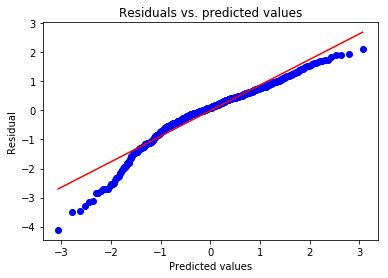

In [121]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, gbr_predict) 

In [122]:
gbr_predict = gbr.predict(X)

In [123]:
gbr_predict = np.floor((np.exp(gbr_predict))-1)

In [124]:
gbr_predict = pd.Series(gbr_predict)

In [125]:
gbr_predict.to_csv('myGBRPrediction.csv')

In [127]:
data.columns

Index(['row_id', 'evictions', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_diabetes', 'pct_physical_inactivity',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictionsNormed'],
      dtype='object')

In [132]:
data.economic_typology.value_counts()

Nonspecialized                        1024
Manufacturing-dependent                410
Farm-dependent                         360
Federal/State government-dependent     290
Recreation                             248
Mining-dependent                       214
Name: economic_typology, dtype: int64

In [138]:
mydata = data.copy()

In [139]:
mydata.shape

(2546, 42)

In [141]:
mydata.columns

Index(['row_id', 'evictions', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_diabetes', 'pct_physical_inactivity',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictionsNormed'],
      dtype='object')

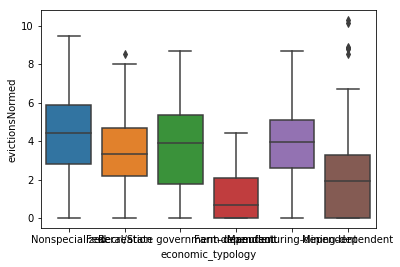

In [152]:
sns.boxplot('economic_typology', 'evictionsNormed', data=mydata)
plt.show()

Take the categorical variable for economic typology and convert this to a dummy variable for use in the predictors

In [153]:
data.rucc.value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         466
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    370
Metro - Counties in metro areas of 1 million population or more                                  358
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     337
Metro - Counties in metro areas of 250,000 to 1 million population                               289
Metro - Counties in metro areas of fewer than 250,000 population                                 261
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        210
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          170
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                       85
Name: rucc, dtype: int64

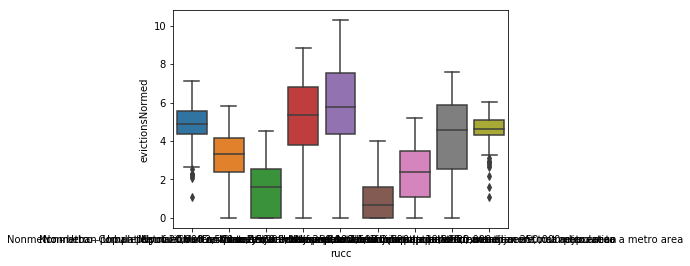

In [156]:
sns.boxplot(x='rucc', y='evictionsNormed', data=mydata)

In [157]:
mydata.head()

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictionsNormed
0,0,681,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,6.525030
1,1,0,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0.000000
2,2,29,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,3.401197
3,3,841,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,6.735780
4,4,2,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,1.098612


In [162]:
mydata['evictionsSquared'] = np.sqrt(data.evictions)

In [163]:
mydata.head()

,row_id,evictions,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,...,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictionsNormed,evictionsSquared
0,0,681,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,...,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,6.525030,26.095977
1,1,0,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,...,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0.000000,0.000000
2,2,29,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,...,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,3.401197,5.385165
3,3,841,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,...,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,6.735780,29.000000
4,4,2,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,...,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,1.098612,1.414214


In [165]:
np.square(mydata.evictionsSquared)

0        681.0
1          0.0
2         29.0
3        841.0
4          2.0
5       4191.0
6         24.0
7        225.0
8         93.0
9          6.0
10        19.0
11         0.0
12         0.0
13        90.0
14       311.0
15         0.0
16       128.0
17         1.0
18        97.0
19       504.0
20       171.0
21        43.0
22        16.0
23        46.0
24        53.0
25        56.0
26         0.0
27         0.0
28         0.0
29         0.0
         ...  
2516       7.0
2517       9.0
2518       6.0
2519       4.0
2520       5.0
2521      60.0
2522      31.0
2523       0.0
2524      54.0
2525     459.0
2526      12.0
2527     200.0
2528     161.0
2529       2.0
2530    6056.0
2531       1.0
2532       1.0
2533      33.0
2534       1.0
2535       0.0
2536       0.0
2537      10.0
2538      11.0
2539      32.0
2540       2.0
2541      16.0
2542       2.0
2543      95.0
2544      82.0
2545    1474.0
Name: evictionsSquared, Length: 2546, dtype: float64